# Предобработка данных и функции потерь в линейной регрессии

## Данные
Для демонстраций загрузим набор данных [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/Automobile). В данных присутствуют категориальные, целочисленные и вещественнозначные признаки.

In [1]:
import pandas as pd
X_raw = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", \
                    header=None, na_values=["?"])

In [2]:
X_raw.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

## Предобработка данных

Предобработка данных важна при применении любых методов машинного обучения, а в особенности для линейных моделей. В sklearn предобработку удобно делать с помощью различных модулей [preprocessing](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) или методов библиотеки pandas.

### Заполнение пропусков
В матрице объекты-признаки могут быть пропущенные значения, и это вызовет ошибку при попытке передать такую матрицу в функцию обучения модели или даже предобработки. Если пропусков немного, можно удалить объекты с пропусками из обучающей выборки. Заполнить пропуски можно разными способами:
* заполнить средними (mean, median);
* предсказывать пропущенные значения по непропущенным.

Часто используют первый вариант - он проще. Для заполнения константами можно использовать метод датафрейма `fillna`, для замены средними - класс `impute.SimpleImputer` (в более старых версиях `scikit-learn` - `preprocessing.Imputer`).

In [4]:
X_raw.isnull().any().any()

True

In [5]:
X_raw.isnull().sum()

0      0
1     41
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask = (X_raw.dtypes == "object").values # категориальные признаки имеют тип "object"

In [8]:
cat_features_mask

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False])

In [9]:
X_raw.dtypes == 'object'

0     False
1     False
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12    False
13    False
14     True
15     True
16    False
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [10]:
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
X_no_mis_real.isna().sum()

0     0
1     0
9     0
10    0
11    0
12    0
13    0
16    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [11]:
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)

In [12]:
X_no_mis.head()

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [13]:
X_no_mis.isnull().any().any()

False

### Преобразование нечисловых признаков
Как вы помните, большниство моделей машинного обучения требуют, чтобы на вход функции обучения подавалас матрица состоящая из вещественных чисел. В процессе обучения используются свойства вещественных чисел, в частности, возможность сравнения и применения арифметических операций. Поэтому, даже если формально в матрице объекты-признаки записаны числовые значения, нужно всегда анализировать, можно ли относиться к ним как к числам. 

__Пример:__ некоторые признаки могут задаваться целочисленными хешами или id (например, id пользователя соц. сети), однако нельзя сложить двух пользователей и получить третьего, исходя из их id (как это может сделать линейная модель).

Напоминаем, что для обработки категориальных признаков, часто применяют [one-hot encoding](http://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) в результате чего, вместо одного признака добавится $K$ бинарных признаков - по одному на каждое возможное значение исходного признака. В `sklearn` это можно сделать с помощью классов `OneHotEncoder`, но проще использовать функцию `pd.get_dummies`.

Следует заметить, что в новой матрице будет очень много нулевых значений. Чтобы не хранить их в памяти, можно задать параметр `OneHotEncoder(sparse=True)` или `pd.get_dummies(sparse=True)`, и метод вернет [разреженную матрицу](http://docs.scipy.org/doc/scipy/reference/sparse.html), в которой хранятся только ненулевые значения. Выполнение некоторых операций с такой матрицей может быть неэффективным, однако большинство методов sklearn умеют работать с разреженными матрицами.

__Вопрос:__ стоит ли применять one-hot encoding для признаков с большим числом категорий (например, id)? Почему?

__Вопрос:__ какая проблема возникнет при применении вышеописанного способа кодирования для обучения линейной регрессии?
    
Необходимо удалить один из столбцов, созданных для каждого признака. Для этого в get_dummies надо поставить drop_first=True.

In [14]:
X_no_mis.shape

(205, 25)

In [15]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(205, 66)


,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3.0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1.0,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


Помимо категориальных, преобразования требуют, например, строковые признаки. Их можно превращать в матрицу частот слов [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer), матрицу частот буквосочетаний фиксированной длины, можно извлекать другие признаки (например, длина строки).

### Масштабирование признаков
При начале работы с данными всегда рекомендуется приводить все признаки к одному масштабу.  Это важно по нескольким причинам:
* ускорение обучения модели;
* улучшение численной устойчивости при работе с матрицей объекты-признаки
* для линейных моделей: интерпретация весов при признаках как меры их значимости

[Полезная ссылка](https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0)

Данные можно масштабировать по-разному:

- Стандартизация - вычитание среднего из каждого признака и деление на стандартное отклонение (`StandardScaler` в `sklearn`).

- Нормализация - вычитание минимума из каждого признака, а затем деление на разницу максимального и минимального значения (`MinMaxScaler` в `sklearn`).

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
normalizer = MinMaxScaler()
X_real_norm_np = normalizer.fit_transform(X_dum)
X = pd.DataFrame(data=X_real_norm_np)

C:\Users\Panic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Panic\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Добавление признаков
Особенно важным моментом для линейной регрессии является нелинейное преобразование признаков. Это позволяет использовать линейную регрессию для моделирования нелинейных зависимостей. 

Наиболее популярны следующие преобразования: 
- полиномиальные признаки (PolynomialFeatures в sklearn)
- взятие логарифма
- квадратного корня
- применение тригонометрических функий.

Например, посмотрев на данные, мы можем заметить, что зависимость целевой переменной от шестого признака скорее квадратичная, чем линейная:

In [19]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

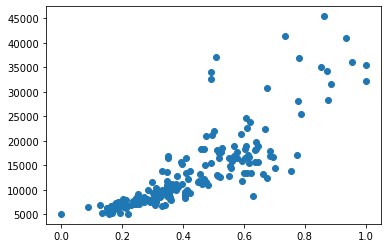

In [20]:
plt.scatter(X[6], y)
plt.show()

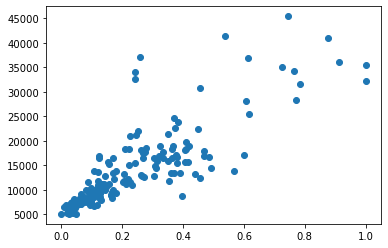

In [21]:
plt.scatter(X[6]**2, y)
plt.show()

> А для признака номер 13 линеаризовать зависимость получается с помощью функции $\frac 1 {\sqrt{x}}$

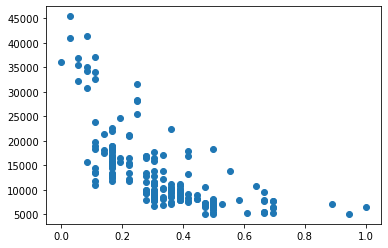

In [22]:
plt.scatter(X[13], y)
plt.show()

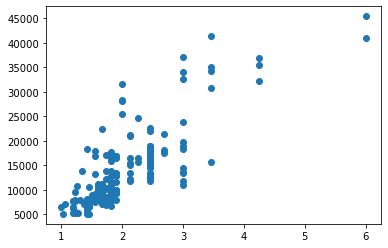

In [23]:
plt.scatter(1 / np.sqrt(X[13]), y)
plt.show()

__Обратите внимание__: при генерации полиномиальных признаков матрица объекты-признаки может занимать много памяти.

## Функции потерь в регрессии

Функционал качества в задачах обучения с учителем обычно задается в виде суммы по объектам выборки:
$$Q(a) = \frac 1 \ell \sum_{i=1}^\ell L(y_i, a(x_i)),$$
где $L(\cdot, \cdot)$ - функция потерь, задающая штраф за разницу между предсказанием и истинным значением целевого признака. Свойства функции потерь:
* $L(y_i, a(x_i)) \geqslant 0$;
* $L(y_i, y_i) = 0$. 

Функционал качества должен в первую очередь отвечать требованиям заказчика, при этом математические свойства функции потерь могут быть неудобны для оптимизации. 

__Пример:__ если мы не различаем маленькие ошибки (между 0.01 и 0.1 нет особой разницы), но зато не хотим получать большие ошибки, можно использовать следующую функцию потерь:

$$L(y_i, a(x_i)) = [| y_i - a(x_i) | < \varepsilon],$$ $\varepsilon$ - допустимая разница между предсказанием и фактом.


### Среднеквадратичная и средняя абсолютная ошибка
Кроме требований заказчика, функционал качества должен учитывать математические особенности модели - например, устойчивость к шумовым объектам. 

В линейной регрессии Mean Squared Error: $L(y_i, a(x_i)) = (a(x_i) - y_i)^2$ не обладает этим свойством, потому что задает очень большие штрафы за большие отклонения от фактического значения. 

$$MSE (a, X, Y) = \sum^L_{i=1}(a(x_i) - y_i)^2$$

Рассмотрим это явление на примере. Выберем один признак, от которого целевой признак (имеющий индекс 15 в матрице X) зависит практически линейно. Добавим к выборке два объекта-выброса и посмотрим, как изменится оптимизированная на MSE прямая.

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
X_subset = X[[7, 15]].values
X_subset_modified = np.vstack((X_subset, [[1, 90], [2, 50]])) # добавление двух шумовых точек

In [26]:
def scatter_points_and_plot_line_MSE(X_subset):
    plt.scatter(X_subset[:, 0], X_subset[:, 1])   # визуализируем точки
    lr = LinearRegression()
    lr.fit(X_subset[:, 0][:, np.newaxis], X_subset[:, 1])  # вычислим веса линейной модели
    grid = np.linspace(0, 2, 100)
    line = lr.predict(grid[:, np.newaxis])
    plt.plot(grid, line)   # визуализируем прямую

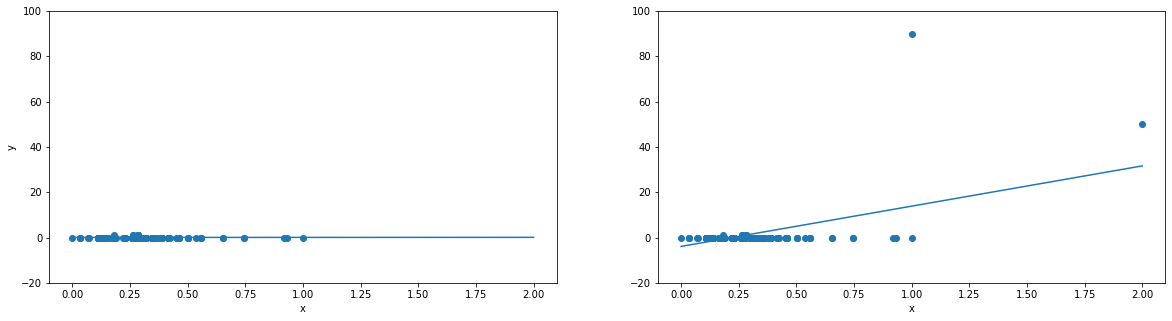

In [27]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_points_and_plot_line_MSE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
scatter_points_and_plot_line_MSE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.show()

**Задание:** Реализуйте функцию для подсчета MSE с использованием numpy

In [29]:
def MSE(y: np.array, y_pred: np.array):
    return np.mean(np.square(y-y_pred))


a = np.array([11,20,19,17,10])
pred = np.array([12,18,19.5,18,9])
mse = MSE(y=a, y_pred=pred)
print("The Mean Square Error is: " , mse)
assert mse == 1.45 

The Mean Square Error is:  1.45


Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения. Из-за того, разница возводится в квадрат - сложно дать этому числу интерпретацию. Для лучшей интерпретации используется Root Mean Square Error (RMSE). Таким образом, если MSE показывает разницу в квадратных единицах, значение RMSE сохранится в исходных. 

$$RMSE (a, X, Y) = \sqrt{MSE (a, X)} = \sqrt{ \sum^L_{i=1}(a(x_i) - y_i)^2}$$

**Задание:** Реализуйте функцию для подсчета RMSE с использованием numpy

In [30]:
def RMSE(y, y_pred):
    return np.sqrt(MSE(y, y_pred))


rmse = RMSE(y=a, y_pred=pred)
print("The Root Mean Square Error is: " , rmse)
assert rmse == 1.2041594578792296

The Root Mean Square Error is:  1.2041594578792296


Коэффициент детерминации $R^2$ показывает долю дисперсии в целевой переменной, которая обьяснена зависимыми переменными. $R^2$ можно интерпретировать как некоторого рода нормированное MSE.

$$R^2(a, X, Y) = 1 - \frac {\sum^L_{i=1}(a(x_i) - y_i)^2}{\sum^L_{i=1}(y_i - \bar{y})^2}$$

**Задание:** реализуйте функцию для вычисления $R^2$

In [38]:
def R_squared(y, y_pred):
    return 1 - MSE(y, y_pred)*len(y)/np.sum(np.square(y-np.mean(y)))

r_squared = R_squared(y=a, y_pred=pred)
print('The R2 is:', r_squared)

The R2 is: 0.914906103286385


Из-за того, что мы учитываем квадрат отклонения - шумовые объекты могут сильно изменить наклон прямой. Поэтому в качестве альтернативы MSE можно использовать Mean Absolute Error: $L(y_i, a(x_i)) = |a(x_i) - y_i|$.

$$MAE(a, X, Y) = \frac {1}{L} \sum^L_{i=1}|a(x_i) - y_i|$$

Теперь обучим регрессию, оптимизируя MAE. В `sklearn` такая регрессия не реализована, но можно использовать модуль `statsmodels` - более формально, необходимая модель может быть получена с помощью обучения квантильной регрессии с параметром `q=0.5`.

**Задание:** Реализуйте функцию для подсчета MAE с использованием numpy

In [39]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))


mae = MAE(y=a, y_pred=pred)
print("The Mean Absolute Error is: " , mae)
assert mae == 1.1

The Mean Absolute Error is:  1.1


!pip install --user git+https://github.com/statsmodels/statsmodels # (если не работает импортирование библиотек ниже)

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
def scatter_points_and_plot_line_MAE(X_subset):
    # задаем зависимость переменной f15 от переменной f7 и передаем данные
    mod = smf.quantreg('f15 ~ f7', pd.DataFrame(data=X_subset, columns=["f7", "f15"]))
    res = mod.fit(q=0.5)
    
    # визуализируем точки
    plt.scatter(X_subset[:, 0], X_subset[:, 1])
    grid = np.linspace(0, 2, 100)
    
    # визуализируем прямую
    plt.plot(grid, grid * res.params["f7"] + res.params["Intercept"])
    return mod, res

C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

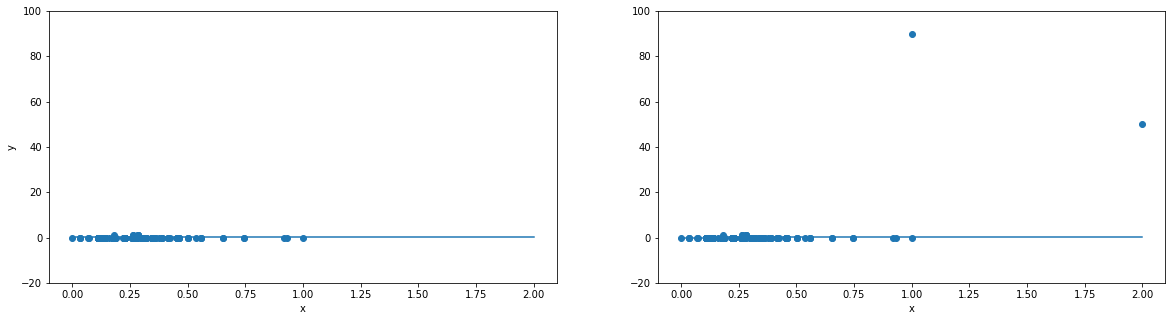

In [43]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified)
plt.ylim(-20, 100)
plt.xlabel("x")

Прямая практически не изменила направление из-за выбросов.

Попробуем добавить больше шумовых объектов:

In [44]:
np.random.seed(13)
X_subset_modified_twice = np.vstack((X_subset_modified, np.random.randint(5, size=60).reshape(-1, 2)*[1, 30])) # добавление 30 шумовых точек

C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:206: RuntimeWarning: divide by zero encountered in double_scalars
  d = np.where(e > 0, (q/fhat0)**2, ((1-q)/fhat0)**2)
C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:208: RuntimeWarning: invalid value encountered in multiply
  xtdx = np.dot(exog.T * d[np.newaxis, :], exog)
C:\Users\Panic\anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:219: RuntimeWarning: divide by zero encountered in double_scalars
  lfit.sparsity = 1. / fhat0


Text(0.5, 0, 'x')

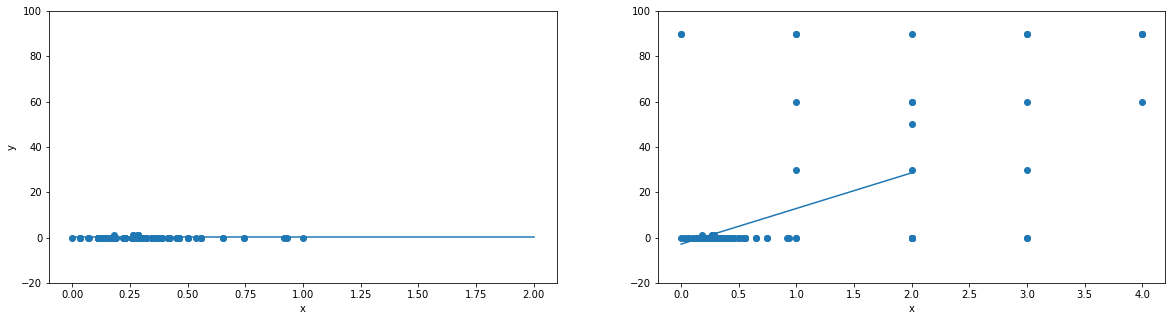

In [45]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
model, result = scatter_points_and_plot_line_MAE(X_subset)
plt.ylim(-20, 100)
plt.xlabel("x")
plt.ylabel("y")
plt.subplot(1, 2, 2)
model, result = scatter_points_and_plot_line_MAE(X_subset_modified_twice)
plt.ylim(-20, 100)
plt.xlabel("x")

Под таким количеством выбросов, изменилась даже регрессия над MAE

---

Рассмотрим некоторые свойства MSE и MAE.

Допустим алгоритм возвращает константное предсказание: $a(x) = C, C \in R$. В качестве примера такого алгоритма можно представить предсказание прибыли в январе константой, равной средней прибыли за январь всех предыдущих лет работы.

__Задача.__ Найдите $C$, минимизирующий среднеквадратичную ошибку.

__Задача.__ Найдите $C$, минимизирующий среднюю абсолютную ошибку.

Поскольку средняя абсолютная ошибка не является дифференцируемой по $w$ функцией, оптимизировать ее напрямую методом градиентного спуска не удастся. Для этого используются [субградиентные](https://ru.wikipedia.org/wiki/Субдифференциал) (что в почти не меняет процедуры спуска, только вместо градиента берется один из субградиентов) или другие методы.

### Huber Loss
Иногда используют "гибрид" MAE и MSE, который, как и MAE, устойчив к шумовым объектам, и как и MSE, мало штрафует малые отклонения от фактического значения целевого признака - Huber Loss:
$$L_i(y_i, a(x_i)) = \phi_\varepsilon(a(x_i) - y_i)$$
$$\phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}$$

Можно проверить, что у этой функции существует непрерывная первая проиводная во всех точках.

Оптимизация Huber Loss реализована в sklearn:

In [46]:
from sklearn.linear_model import HuberRegressor

**Задание:** реализуйте функцию потерь Хьюбера

In [47]:
def Huber(y, y_pred):
    eps = 1e-3
    z = y_pred-y
    squared_part =1/2*z**2
    abs_part = np.abs(z)-1/2*eps
    
    indic_vect = np.zeros_like(y)
    indic_vect[z<np.abs(eps)]=squared_part[z<np.abs(eps)]
    indic_vect[~(z<np.abs(eps))]=abs_part[~(z<np.abs(eps))]
    return np.mean(indic_vect)

huber = Huber(y=a, y_pred=pred)
print("The Huber Loss is:", huber)

The Huber Loss is: 0.4


### Mean Squared Logarifmic Erorr (MSLE)

Данная функция потерь применяется в случаях, когда лучше получать заниженные прогнозы, нежели завышенные.

Важное примечание: из-за присутствия логарифма в формуле **целевая переменная должна быть неотрицательной!**. Единицу добавляем, чтобы случайно не получить логарифм нуля.

$$L_i(a, X_i, Y_i) = (\log(a(x_i)+1) - \log(y_i+1))^2$$

**Задание:** реализуйте MSLE

In [49]:
def MSLE(y, y_pred):
    return np.mean(np.square(np.log(1+y_pred)-np.log(y+1)))

msle = MSLE(y=a, y_pred=pred)
print("The Mean Squared Logarifmic Error is:", msle)

The Mean Squared Logarifmic Error is: 0.005808110727039668


### Quantile Loss

В некоторых задачах штраф за ошибку зависит не только от величины абсолютного отклонения от фактического значения, но и от знака этого отклонения. Например, лучше предсказать спрос больше, чем будет по факту, чем меньше, потому что во втором случае будет потеряна прибыль. В этом случае используется квантильная регрессия со следующей функцией потерь:
$$L_i(y_i, a(x_i)) = \rho_\tau(y_i - x_i^T w),$$
$$\rho_\tau(z) = \begin{cases} \tau z, \quad z > 0, \\ (\tau - 1) z, \quad z \leqslant 0 \end{cases}$$
Параметр $\tau \in (0, 1)$ влияет на то, насколько различаются штрафы за положительную и отрицательную разницу.

Изобразим график квантильной функции потерь вместе с некоторыми другими рассмотренными:

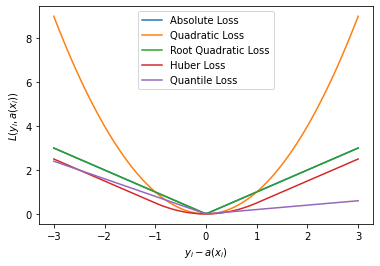

In [50]:
grid = np.linspace(-3, 3, 100)
quantile_tau = 0.2
mse_loss = grid ** 2
rmse_loss = np.sqrt(mse_loss)
mae_loss = np.abs(grid)
huber_loss = 0.5 * mse_loss * (grid >= -1) * (grid <= 1) + (mae_loss - 0.5) * (grid < -1) + (mae_loss - 0.5)  * (grid > 1)
quantile_loss = quantile_tau * grid * (grid > 0) + (quantile_tau - 1) * grid * (grid <= 0)
plt.plot(grid, mae_loss, label="Absolute Loss")
plt.plot(grid, mse_loss, label="Quadratic Loss")
plt.plot(grid, rmse_loss, label="Root Quadratic Loss")
plt.plot(grid, huber_loss, label="Huber Loss")
plt.plot(grid, quantile_loss, label="Quantile Loss")
plt.xlabel("$y_i - a(x_i)$")
plt.ylabel("$L(y_i, a(x_i))$")
plt.legend()
plt.show()

__Задача.__ Укажите параметр $\tau$, при котором обучение квантильной регрессии равносильно оптимизации MAE.

Проследим наклон прямой в нашей одномерной задаче регрессии при изменении $\tau$:

Text(0, 0.5, 'y')

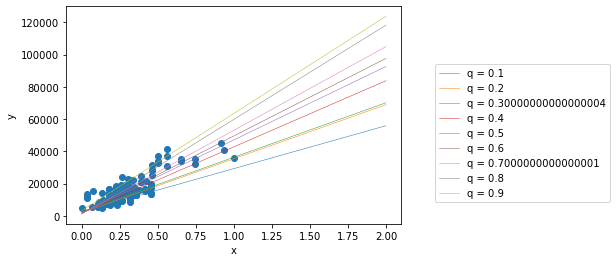

In [51]:
plt.scatter(X[7], y)

grid = np.linspace(0, 2, 100)
dat = pd.DataFrame({"x":X[7], "y":y})
mod = smf.quantreg('y ~ x', dat)

for q in np.arange(0.1, 1, 0.1):
    res = mod.fit(q=q)
    plt.plot(grid, grid * res.params["x"] + res.params["Intercept"], linewidth=0.5, label="q = "+str(q))

plt.legend(loc=(1.1, 0.1))
plt.xlabel("x")
plt.ylabel("y")

# Practice

Мы поработаем с данными о сообществах в США. Описание датасета:

http://archive.ics.uci.edu/ml/datasets/communities+and+crime

Датасет на кэггле (в формате .csv):

https://www.kaggle.com/kkanda/communities%20and%20crime%20unnormalized%20data%20set

Будем предсказывать количество насильственных преступлений относительно численности населения.

In [52]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings('ignore')

In [53]:
data = pd.read_csv('crimedata.csv', na_values=["?"])

# оставим лишь нужные колонки
requiredColumns = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]
data = data[data.columns[requiredColumns]]

# некоторые значения целевой переменной пропущены
X = data.loc[data['ViolentCrimesPerPop'].notnull(), :].drop('ViolentCrimesPerPop', axis=1)
y = data['ViolentCrimesPerPop'][X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### 1 Baseline

Обучим линейную регрессию и выведем качество по метрике MSE на обучающей и тестовой выборке.

In [56]:
lr = LinearRegression().fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

# Выведите ниже качество на обучении и тесте, рассчитаное с использованием функции
# MSE(), написанной вами ранее
# Сравните результаты
# YOUR CODE HERE
print(f'Train:{MSE(y_train, lr.predict(X_train))}')
print(f'Test:{MSE(y_test, lr.predict(X_test))}')

Train: 164587.7526422592
Test: 331616.79531682015
Train:164587.75264225915
Test:331616.79531682003


Популярным решением для регрессионных моделей является **регуляризация**.

Во время оптимизации линейной регрессии, веса при переменных могут получится большими в абсолютных значениях. Это не очень хорошо, поскольку классификатор будет чувствителен к крайне маленьким изменениям в признаках объекта, а значит, переобучен.

Для решения проблемы к функционалу ошибки добавляют так называемсый регуляризатор, который "штрафует" модель за слишком большую норму вектора весов:


$$Q\alpha(w) = Q(w) + \alpha R(w)$$ 

где $R(w)$ - регуляризатор

Наиболее распространенными являются L1 и L2 регуляризаторы
$$L2: R(w) = ||w||_1 = \sum^d_{i>1} w_i^2$$

$$L1: R(w) = ||w||_2 = \sum^d_{i>1} |w_i|$$

Давайте применим каждый из них к нашей задаче и посмотрим на изменение в результатах.


В качестве метода регуляризации используем Ridge ($L_2$-регуляризация).

In [57]:
ridge = Ridge(5.0).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))

Train: 120349.55028715698
Test: 206958.22395453497


### 2 Scaling

Попробуем MinMaxScaler.

In [59]:
sc = MinMaxScaler()
X_train_scaled = pd.DataFrame(data=sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)

**Задание:** Напишите код обучения линейной регресии на масштабированных признаках и выведите ошибку на обучающей и валидационной выборке

In [61]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
mean_squared_error(y_train, lr.predict(X_train_scaled))


119941.46284397994

In [62]:
mean_squared_error(y_test, lr.predict(X_test_scaled))

207052.44323141285

**Задание:** проделайте аналогичную работу, добавив Ridge регуляризацию

In [64]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
mean_squared_error(y_train, ridge.predict(X_train_scaled))

124690.43547001755

In [65]:
mean_squared_error(y_test, ridge.predict(X_test_scaled))

180421.8851477208

### 3. High/low variance

Полезны ли признаки, имеющие высокую дисперсию? А низкую?

Высокая дисперсия высокое количество инфомации которую могут сообщить данные, но могут быть и большие шумы и выбросы надо знать грань

In [66]:
features_variance = X_train_scaled.var().sort_values(ascending=False)
features_variance.head()

pctUrban          0.197731
RentHighQ         0.063005
MedYrHousBuilt    0.054831
OwnOccHiQuart     0.048807
MedRent           0.046863
dtype: float64

Попробуем удалить признаки с самой низкой дисперсией и посмотреть, как изменится качество. В sklearn есть специальный инструмент для такого наивного отбора признаков. Стоит ли нормализовать перед этим признаки?

In [67]:
from sklearn.feature_selection import VarianceThreshold

In [70]:
X_train.var()

population          1.501308e+10
householdsize       1.115701e-01
agePct12t21         2.039814e+01
agePct12t29         3.860770e+01
agePct16t24         3.550577e+01
                        ...     
PctForeignBorn      7.432354e+01
PctBornSameState    2.888412e+02
PctSameHouse85      1.138241e+02
PctSameCity85       1.157384e+02
PctSameState85      5.418524e+01
Length: 88, dtype: float64

In [71]:
X_train_scaled.var()

population          0.001243
householdsize       0.013175
agePct12t21         0.009548
agePct12t29         0.010796
agePct16t24         0.010450
                      ...   
PctForeignBorn      0.020495
PctBornSameState    0.039707
PctSameHouse85      0.025562
PctSameCity85       0.024565
PctSameState85      0.012045
Length: 88, dtype: float64

In [68]:
# можно убрать все признаки, дисперсия которых меньше заданного значения
vs_transformer = VarianceThreshold(0.01)

X_train_var = pd.DataFrame(data=vs_transformer.fit_transform(X_train_scaled), columns=X_train_scaled.columns[vs_transformer.get_support()])
X_test_var = pd.DataFrame(data=vs_transformer.transform(X_test_scaled), columns=X_test_scaled.columns[vs_transformer.get_support()])

X_train_var.shape

(1495, 76)

In [69]:
lr = LinearRegression().fit(X_train_var,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_var))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_var))))

Train: 126034.89846688963
Test: 150452.62836793592


In [72]:
ridge = Ridge(5.0).fit(X_train_var,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_var))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_var))))

Train: 136186.7830145162
Test: 152046.2156689088


### 4 Correlation

Можно выбрать k признаков, которые дают наиболее высокие значения корреляции с целевой переменной.

In [73]:
from sklearn.feature_selection import SelectKBest, f_regression

In [74]:
# Выбираем 15 лучших признаков
sb = SelectKBest(f_regression, k=15)

X_train_kbest = pd.DataFrame(data=sb.fit_transform(X_train_var, y_train), columns=X_train_var.columns[sb.get_support()])
X_test_kbest = pd.DataFrame(data=sb.transform(X_test_var), columns=X_test_var.columns[sb.get_support()])

In [75]:
lr = LinearRegression().fit(X_train_kbest,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_kbest))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_kbest))))

Train: 147378.18578795987
Test: 156005.78035892398


In [76]:
ridge = Ridge(5.0).fit(X_train_kbest,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_kbest))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_kbest))))

Train: 158023.1329983348
Test: 166680.07085931374


А можно выбрать самые значимые признаки с точки зрения регрессии с $L_1$-регуляризацией.

In [77]:
from sklearn.feature_selection import SelectFromModel

In [80]:
lasso = Lasso(5.0)
l1_select = SelectFromModel(lasso)

X_train_l1 = pd.DataFrame(data=l1_select.fit_transform(X_train_var, y_train), columns=X_train_var.columns[l1_select.get_support()])
X_test_l1 = pd.DataFrame(data=l1_select.transform(X_test_var), columns=X_test_var.columns[l1_select.get_support()])

X_train_l1.shape
X_train_l1.head()

,pctUrban,pctWInvInc,MalePctDivorce,TotalPctDiv,PctKids2Par,PctWorkMom,PctKidsBornNeverMar,PctLargHouseFam,PctPersDenseHous,MedYrHousBuilt,PctForeignBorn,PctBornSameState
0,1.0,0.345125,0.527534,0.565725,0.685121,0.377056,0.085986,0.082349,0.021902,0.354167,0.034374,0.781100
1,0.0,0.270553,0.228411,0.312039,0.614262,0.512864,0.231501,0.483243,0.375068,0.645833,0.468615,0.501466
2,1.0,0.504499,0.366708,0.417076,0.737927,0.683889,0.124018,0.084264,0.046724,0.479167,0.191299,0.640169
3,1.0,0.540984,0.554443,0.635749,0.802166,0.626318,0.056222,0.086179,0.039241,0.833333,0.155928,0.374839
4,1.0,0.680143,0.262203,0.297297,0.878141,0.648250,0.019016,0.108203,0.007666,0.270833,0.009631,0.652949


In [79]:
lr = LinearRegression().fit(X_train_l1,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train_l1))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test_l1))))

ridge = Ridge(5.0).fit(X_train_l1,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train_l1))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test_l1))))

Train: 140757.45879349473
Test: 153086.92726760302
Train: 143263.16845636512
Test: 157553.36533174038


### 5 Pipeline

А можно сделать все вышеописанное сразу:

In [92]:
from sklearn.pipeline import Pipeline


pipe = Pipeline(steps=[
    ('scaler', MinMaxScaler()),
    ('variance', VarianceThreshold(0.01)),
    ('selection', SelectFromModel(Lasso(5.0))),
    ('regressor', Ridge(5.0))
])

pipe.fit(X_train, y_train)

pipe.named_steps

{'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=5.0)),
 'regressor': Ridge(alpha=5.0)}

In [93]:
print ("Train: {}".format(mean_squared_error(y_train, pipe.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, pipe.predict(X_test))))

Train: 143263.16845636512
Test: 157553.36533174038


Можно также настраивать параметры с помощью `GridSearch`:

In [94]:
pipe.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('variance', VarianceThreshold(threshold=0.01)),
  ('selection', SelectFromModel(estimator=Lasso(alpha=5.0))),
  ('regressor', Ridge(alpha=5.0))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=5.0)),
 'regressor': Ridge(alpha=5.0),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'variance__threshold': 0.01,
 'selection__estimator__alpha': 5.0,
 'selection__estimator__copy_X': True,
 'selection__estimator__fit_intercept': True,
 'selection__estimator__max_iter': 1000,
 'selection__estimator__normalize': 'deprecated',
 'selection__estimator__positive': False,
 'selection__estimator__precompute': False,
 'selection__estimator__random_state': None,
 'selection__estimator__selection': 'cyclic',
 'selection__estimator__tol': 0.0001,
 'selection__estimator__warm_start': False,
 'selection__estimator': La

In [91]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {
    'variance__threshold': [0.005, 0.0075, 0.009, 0.01, 0.011, 0.012],
    'selection__estimator__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0],
    'regressor__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 10.0]
}
grid_search = GridSearchCV(pipe, param_grid, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('variance',
                                        VarianceThreshold(threshold=0.01)),
                                       ('selection',
                                        SelectFromModel(estimator=Lasso(alpha=5.0))),
                                       ('regressor', Ridge(alpha=5.0))]),
             param_grid={'regressor__alpha': [0.1, 0.5, 1.0, 1.5, 2.0, 5.0,
                                              10.0],
                         'selection__estimator__alpha': [0.1, 0.5, 1.0, 1.5,
                                                         2.0, 5.0, 10.0],
                         'variance__threshold': [0.005, 0.0075, 0.009, 0.01,
                                                 0.011, 0.012]})

In [97]:
pipe_best = grid_search.best_estimator_
pipe_best.named_steps

{'scaler': MinMaxScaler(),
 'variance': VarianceThreshold(threshold=0.01),
 'selection': SelectFromModel(estimator=Lasso(alpha=0.1)),
 'regressor': Ridge(alpha=0.5)}

In [98]:
pipe_best.fit(X_train, y_train)
print ("Train: {}".format(mean_squared_error(y_train, pipe_best.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, pipe_best.predict(X_test))))

Train: 128441.16453337146
Test: 147186.9224914217


### Источники
[Лекции Евгения Соколова в рамках курса МО-1](https://github.com/esokolov/ml-course-hse/blob/master/2019-fall/lecture-notes/)

[Семинар Евгения Ковалева в рамках данного курса в 2019 году](https://github.com/KovalevEvgeny/minor2019-iad2/blob/master/sem05_linreg/sem05_linear_regression.ipynb)

[Семинар Евгения Ковалева в рамках данного курса в 2020 году](https://github.com/KovalevEvgeny/minor2020-iad4/blob/master/sem06_linreg/sem06_linreg.ipynb)

[Семинар Евгения Ковалева, посвященный отбору признаков и регуляризации (2020)](https://github.com/KovalevEvgeny/minor2019-iad2/tree/master/sem06_feature_selection_regularization)